<a href="https://colab.research.google.com/github/nathalieveronika/extreme_value_theory/blob/master/4ClassicEVT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Chapter 4 - Classic Extrem Value Theory

### Introducing Extreme Value Distributions and their pdf's

Plot of **Gumbel** density function and **Frechét**, **Weibull** density function with xi = 1

In [0]:
from google.colab import files
from google.colab import drive

In [0]:
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
filepath = '/content/drive/My Drive/Bachelor Arbeit OLD/Plots/'

<Figure size 432x288 with 0 Axes>

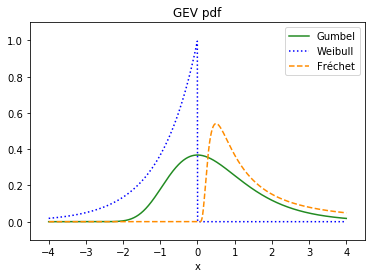

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r, weibull_max, invweibull

f = plt.figure()
fig, ax = plt.subplots()

x = np.linspace(-4,4,1000)
xi = 1
#plt.plot(x, gumbel_r.pdf(x))
#plt.plot(x,weibull_max.pdf(x,xi))
#plt.plot(x,invweibull.pdf(x,xi))

plt.xlim(-4.5,4.5) 
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.title('GEV pdf')
ax.plot(x, gumbel_r.pdf(x),label='Gumbel',color="forestgreen") 
ax.plot(x,weibull_max.pdf(x,xi),label='Weibull',linestyle=":",color="blue") 
ax.plot(x,invweibull.pdf(x,xi),label='Fréchet',linestyle="--",color="darkorange")
legend = ax.legend() 
plt.savefig(filepath+"myEVdensities.png", bbox_inches = 'tight')
#files.download("myEVdensities.png")
plt.show()

Plot of **Gumbel** distribution function and **Frechét**, **Weibull** distribution function with $\xi = 1$

<Figure size 432x288 with 0 Axes>

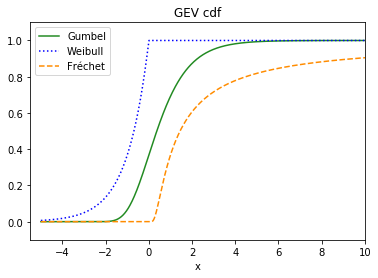

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r, weibull_max, invweibull

f = plt.figure()
fig, ax = plt.subplots()

x = np.linspace(-5,15,1000)
xi = 1
#plt.plot(x, gumbel_r.pdf(x))
#plt.plot(x,weibull_max.pdf(x,xi))
#plt.plot(x,invweibull.pdf(x,xi))

plt.xlim(-5.5,10) 
plt.ylim(-0.1,1.1)
plt.xlabel('x')
plt.title('GEV cdf')
ax.plot(x, gumbel_r.cdf(x),label='Gumbel',color="forestgreen") 
ax.plot(x,weibull_max.cdf(x,xi),label='Weibull',linestyle=":",color="blue") 
ax.plot(x,invweibull.cdf(x,xi),label='Fréchet',linestyle="--",color="darkorange")
legend = ax.legend() 
plt.savefig(filepath+"myEVdistributions.png", bbox_inches = 'tight')
#files.download("myEVdensities.png")
plt.show()

### Analogies between Fisher-Tippet Theorem and CLT

Consider i.i.d. random variables which are **Exp(1)** distributed. 

> As n increases the normalised and centered maxima converges to a Gumbel distribution.



<Figure size 432x288 with 0 Axes>

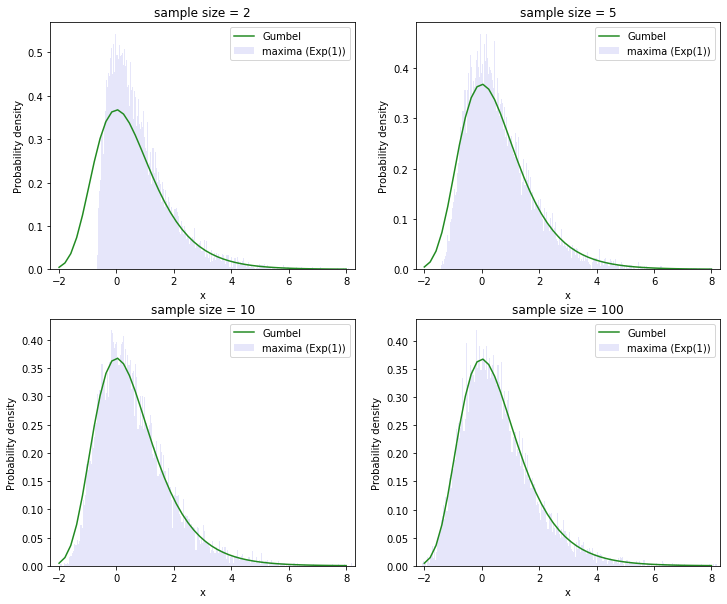

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r

f = plt.figure() 
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(12,10)) #zwei reihen
#fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4) #nebeneinander
#fig, (ax1,ax2,ax3,ax4) = plt.subplots(4) #untereinander
 
#drawing sample from exponential distribution with lambda = llambda = 1/scale
#empty list to insert the maximum of each draw (10000 times)

#for sample_size_n in [2**i for i in range(1,7)]:
for sample_size_n, ax in zip([2,5,10,100],[ax1,ax2,ax3,ax4]):
  draws = 10000
  maxima = []
  for _ in range(draws):
      sample = np.random.exponential(scale=1,size=sample_size_n) 
      maxima.append(sample.max()-math.log(sample_size_n)) #centered by ln(n)
  
  x = np.linspace(-2,8)
  ax.plot(x, gumbel_r.pdf(x),label='Gumbel',color="forestgreen")
  ax.hist(maxima,bins=300,density=True,label='maxima (Exp(1))',color="lavender")
  ax.title.set_text(f'sample size = {sample_size_n}')
  ax.legend()
  ax.set_xlim(-2.3,8.3)
  ax.set_xlabel('x')
  ax.set_ylabel('Probability density')

#plt.subplots_adjust(left=-2) #nebeneinander
#plt.subplots_adjust(top=3) #untereinander
#plt.subplots_adjust() #zwei reihen, top=1.5,right=1.4, bottom=0, left=-0.1
plt.savefig(filepath+"Exponential&Gumbel.png", bbox_inches = 'tight')
plt.show()


Consider i.i.d. random variables which are **Cauchy** distributed.



> As n increases the normalised and centered maxima converges to a Fréchet distribution

<Figure size 432x288 with 0 Axes>

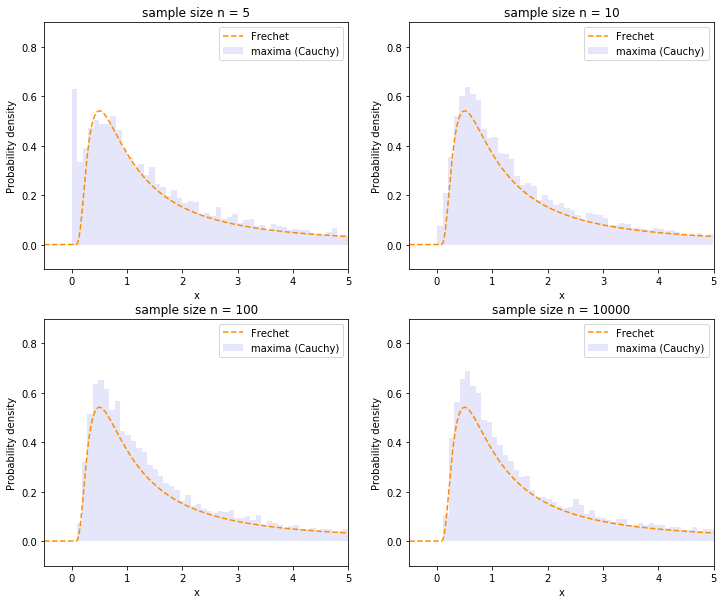

In [0]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import cauchy, invweibull
from mpmath import *

#mp.dps = 2; mp.pretty = True
f = plt.figure()
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(12,10)) 

alpha = 1
for sample_size_n, ax in zip([5,10,100,10000], [ax1,ax2,ax3,ax4]):
  draws = 10000
  maxima = []
  for _ in range(draws):
      sample = np.random.standard_cauchy(size=sample_size_n)
      if sample.max()>0:
            maxima.append(float(sample.max()*pi/sample_size_n)) #centered and normalizes with b=0, a=cot(pi/n)  
            # auch mal mit 1/(tan(pi/2-pi/sample_size_n)) probiert, 
            # dann brauchts noch diese Bedingung: and tan(pi/2-pi/sample_size_n)!=0
      else:
        maxima.append(0)
  x = np.linspace(-4,5,10000)
  ax.set_xlim(-0.5,5) 
  ax.set_ylim(-0.1,0.9)
  ax.set_xlabel('x')
  ax.set_ylabel('Probability density')
  ax.plot(x,invweibull.pdf(x,alpha),label='Frechet',linestyle="--",color="darkorange")
  maxima = np.array(maxima)
  maxima = maxima[(maxima>-4) & (maxima<5)]
 
  ax.hist(maxima,bins=50,density=True,label='maxima (Cauchy)',color="lavender") 
  ax.title.set_text(f'sample size n = {sample_size_n}')
  ax.legend()

plt.savefig(filepath+"Chauchy&Frechet.png", bbox_inches = 'tight')
plt.show()


Consider i.i.d. random variables which are **Uniformly** distributed on (0,1).

> As n increases the normalised and centered maxima converges to a Weibull distribution with alpha = 1

<Figure size 432x288 with 0 Axes>

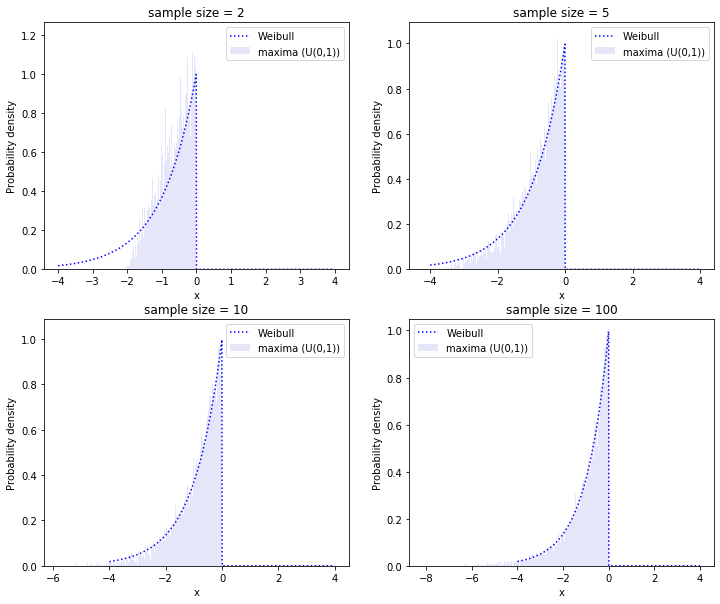

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gumbel_r, weibull_max, invweibull

f = plt.figure()
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(12,10)) 

alpha = 1
for sample_size_n, ax in zip([2,5,10,100],[ax1,ax2,ax3,ax4]):
  draws = 10000
  maxima = []
  for _ in range(draws):
      sample = np.random.uniform(0,1,size=sample_size_n) 
      maxima.append((sample.max()-1)*sample_size_n) #centered and normalizes with b=1, a=n
   
  x = np.linspace(-4,4,1000)
  ax.set_xlabel('x')
  ax.set_ylabel('Probability density')
  ax.plot(x,weibull_max.pdf(x,alpha),label='Weibull',linestyle=":",color="blue") 
  ax.hist(maxima,bins=300,density=True,label='maxima (U(0,1))',color="lavender")
  ax.title.set_text(f'sample size = {sample_size_n}')
  ax.legend()

plt.savefig(filepath+"Uniform&Weibull.png", bbox_inches = 'tight')
           
plt.show()



#plt.xlim(-4.5,4.5) 
#plt.ylim(-0.1,1.1)
#plt.savefig(".png")
#files.download(".png")

### Introducing Generalized Pareto distribution and its pmf and cdf


probability denisity functions for $\xi=1,5,10$, $\,\sigma = 0,1$ and $\mu = 0$



<Figure size 432x288 with 0 Axes>

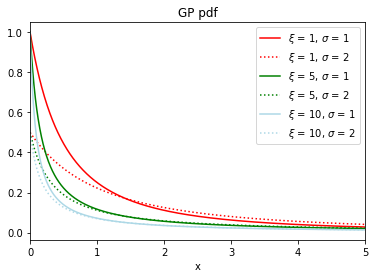

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto

f = plt.figure()
fig, ax = plt.subplots()

x = np.linspace(0,5,1000)
xi = [1,5,10]
sigma = [1,2]
ax.title.set_text("GP pdf")
ax.set_xlim(0,5) 
#plt.ylim(-0.1,1.1)
plt.xlabel('x')
#plt.ylabel('Probability density')
ax.plot(x, genpareto.pdf(x,c=xi[0],scale=sigma[0]), 
        label = f'$\u03BE$ = {xi[0]}, $\u03C3$ = {sigma[0]}', color = "red")
ax.plot(x, genpareto.pdf(x,c=xi[0],scale=sigma[1]), 
        label = f'$\u03BE$ = {xi[0]}, $\u03C3$ = {sigma[1]}', linestyle =":", color = "red")
ax.plot(x, genpareto.pdf(x,c=xi[1],scale=sigma[0]), 
        label = f'$\u03BE$ = {xi[1]}, $\u03C3$ = {sigma[0]}', color = "green")
ax.plot(x, genpareto.pdf(x,c=xi[1],scale=sigma[1]), 
        label = f'$\u03BE$ = {xi[1]}, $\u03C3$ = {sigma[1]}', linestyle =":", color = "green")
ax.plot(x, genpareto.pdf(x,c=xi[2],scale=sigma[0]), 
        label = f'$\u03BE$ = {xi[2]}, $\u03C3$ = {sigma[0]}', color = "lightblue")
ax.plot(x, genpareto.pdf(x,c=xi[2],scale=sigma[1]), 
        label = f'$\u03BE$ = {xi[2]}, $\u03C3$ = {sigma[1]}', linestyle =":", color = "lightblue")

legend = ax.legend() 
plt.savefig(filepath+"myGPdensities.png", bbox_inches = 'tight')
plt.show()

cummulative distribution functions for $\xi=1,5,10$, $\,\sigma = 0,1$ and $\mu = 0$


<Figure size 432x288 with 0 Axes>

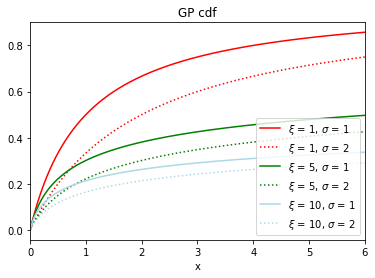

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto

f = plt.figure()
fig, ax = plt.subplots()

x = np.linspace(0,6,1000)
xi = [1,5,10]
sigma = [1,2]
ax.title.set_text("GP cdf")
ax.set_xlim(0,6) 
#plt.ylim(-0.1,1.1)
plt.xlabel('x')
ax.plot(x, genpareto.cdf(x,c=xi[0],scale=sigma[0]), 
        label = f'$\u03BE$ = {xi[0]}, $\u03C3$ = {sigma[0]}', color = "red")
ax.plot(x, genpareto.cdf(x,c=xi[0],scale=sigma[1]), 
        label = f'$\u03BE$ = {xi[0]}, $\u03C3$ = {sigma[1]}', linestyle =":", color = "red")
ax.plot(x, genpareto.cdf(x,c=xi[1],scale=sigma[0]), 
        label = f'$\u03BE$ = {xi[1]}, $\u03C3$ = {sigma[0]}', color = "green")
ax.plot(x, genpareto.cdf(x,c=xi[1],scale=sigma[1]), 
        label = f'$\u03BE$ = {xi[1]}, $\u03C3$ = {sigma[1]}', linestyle =":", color = "green")
ax.plot(x, genpareto.cdf(x,c=xi[2],scale=sigma[0]), 
        label = f'$\u03BE$ = {xi[2]}, $\u03C3$ = {sigma[0]}', color = "lightblue")
ax.plot(x, genpareto.cdf(x,c=xi[2],scale=sigma[1]), 
        label = f'$\u03BE$ = {xi[2]}, $\u03C3$ = {sigma[1]}', linestyle =":", color = "lightblue")

legend = ax.legend(loc='lower right') 
plt.savefig(filepath+"myGPdistributions.png", bbox_inches = 'tight')
plt.show()

Example 1: 
* Let $X_{1},...,X_{n}$ be i.i.d. **exponentially** distributed random variables for $x>0$ and let $u=$.

Then $\mathbb{P}(X-u\leq x|X>u)$ is approximately GP distributed with $\xi =0$ and $\sigma = 1 $ (and $\mu = 0$)
See limiting cdf below, plotted against empirical cdf

<Figure size 432x288 with 0 Axes>

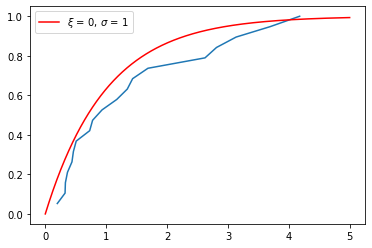

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto

from statsmodels.distributions.empirical_distribution import ECDF

f = plt.figure()
fig, ax = plt.subplots()

u = 4
s = 1

sample = np.random.exponential(scale=1,size=1000) 
ecdf = ECDF(sample[sample>=u])
#ecdf = ECDF(sample)
#plt.plot(ecdf.x, ecdf.y)
plt.plot(ecdf.x-u, ecdf.y)

xx = np.linspace(0,5,1000)
ax.plot(xx, genpareto.cdf(xx,c=0,scale=s), 
        label = f'$\u03BE$ = 0, $\u03C3$ = 1', color = "red")
legend = ax.legend() 
#plt.savefig(filepath+"myGPdensities.png", bbox_inches = 'tight')
plt.show()

Examples 3: 
* Let $X_{1},...,X_{n}$ be i.i.d. **uniformly** distributed random variables on $[0,1]$ and let $u=0.8$.

Then $\mathbb{P}(X-0.8\leq x|X>0.8)$ is approximately GP distributed with $\xi =-1$ and $\sigma = 1-u=0.2 $ (and $\mu = 0$)

See limiting cdf below, plotted against empirical cdf

<Figure size 432x288 with 0 Axes>

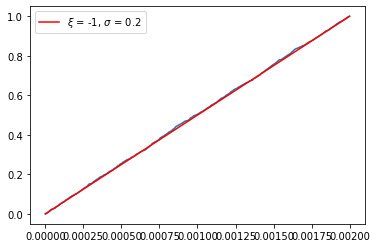

In [0]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import genpareto

from statsmodels.distributions.empirical_distribution import ECDF

f = plt.figure()
fig, ax = plt.subplots()

u = 0.998
s = 1 - u

sample = np.random.uniform(0,1,size=1000000) 
x=[0,1]
#plt.hist(sample[sample>=u],bins=100,density=True)
ecdf = ECDF(sample[sample>=u])
plt.plot(ecdf.x-u, ecdf.y)

xx = np.linspace(0,s,1000)
ax.plot(xx, genpareto.cdf(xx,c=-1,scale=s), 
        label = f'$\u03BE$ = -1, $\u03C3$ = 0.2', color = "red")
legend = ax.legend() 
#plt.savefig(filepath+"myGPdensities.png", bbox_inches = 'tight')
plt.show()